# **Future Foundations: Projecting Real Estate Values with AI**

In [1]:
#Loading Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
Dataset = pd.read_csv("/content/drive/MyDrive/Machine_Learning/House_Price_Pred/bengaluru_house_prices.csv")
Dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### **EDA**

In [3]:
#Exploring Dimensions and Structure of the Data
print("Dimensions of the Data - ", Dataset.shape)
print(Dataset.info())

Dimensions of the Data -  (13320, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None


In [4]:
Dataset.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
for col in Dataset:
    if Dataset[col].dtype == 'object':
        print(" ----------------- ")
        print(Dataset[col].value_counts())

 ----------------- 
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
 ----------------- 
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
 ----------------- 
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
 ----------------- 
2 BHK         5

*The total_sqft and size columns should be of numeric but some String values are there so we have to clean them.*

### **Preprocessing**

In [6]:
#Making Subset by removing unwanted Columns
df1 = Dataset.drop(['society', 'availability'], axis = 'columns')
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [8]:
print(df1.balcony.unique())
df1.balcony.value_counts()

[ 1.  3. nan  2.  0.]


2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [9]:
df1.dropna(subset=['size', 'location'], inplace=True)

In [10]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split()[0]))

In [11]:
df1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df1['bath'] = df1.groupby(['total_sqft', 'size'])['bath'] \
                .transform(lambda x: x.fillna(x.median()))
df1['balcony'] = df1.groupby(['total_sqft', 'bath', 'size'])['balcony'] \
                .transform(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

In [13]:
df1.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           49
balcony       305
price           0
bhk             0
dtype: int64

In [14]:
bath_overall_median = df1['bath'].median()
df1['bath'] = df1['bath'].fillna(bath_overall_median)
bal_overall_median = df1['balcony'].median()
df1['balcony'] = df1['balcony'].fillna(bal_overall_median)

df1.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [15]:
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [16]:
df1[df1['bhk']>20]

,area_type,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


*Which 43 Rooms for 2400 Sqft is Error*

In [17]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

*We can see the total_sqft is having values like (1133 - 1384)*

In [18]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [19]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [20]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1])) / 2
  try:
    return float(x)
  except:
    return None

In [21]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft_to_num)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
df1.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                         4 BHK
total_sqft                  2475.0
bath                           4.0
balcony                        0.0
price                        186.0
bhk                              4
Name: 30, dtype: object

In [23]:
df1.loc[410]

area_type     Super built-up  Area
location                   Kengeri
size                         1 BHK
total_sqft                     NaN
bath                           1.0
balcony                        0.0
price                         18.5
bhk                              1
Name: 410, dtype: object

In [24]:
df2 = df1.dropna()
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [25]:
df3 = df2.copy()
df3['price_per_sqft'] = df2['price']*100000 / df2['total_sqft']
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [26]:
len(df3.location.unique())

1298

In [27]:
df3.location = df3.location.apply(lambda x: x.strip())
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [28]:
len(location_stats[location_stats <= 10])

1047

In [29]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [30]:
len(df3.location.unique())

1287

In [31]:
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df3.location.unique())

241

In [32]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [33]:
df3[df3.total_sqft / df3.bhk < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [34]:
df4 = df3[~(df3.total_sqft / df3.bhk < 300)]
df4.shape

(12513, 9)

In [35]:
df4.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
#Mean and Standard Deviation Per Location - Removing Outliers

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

In [37]:
df5 = remove_pps_outliers(df4)
df5.shape

(10288, 9)

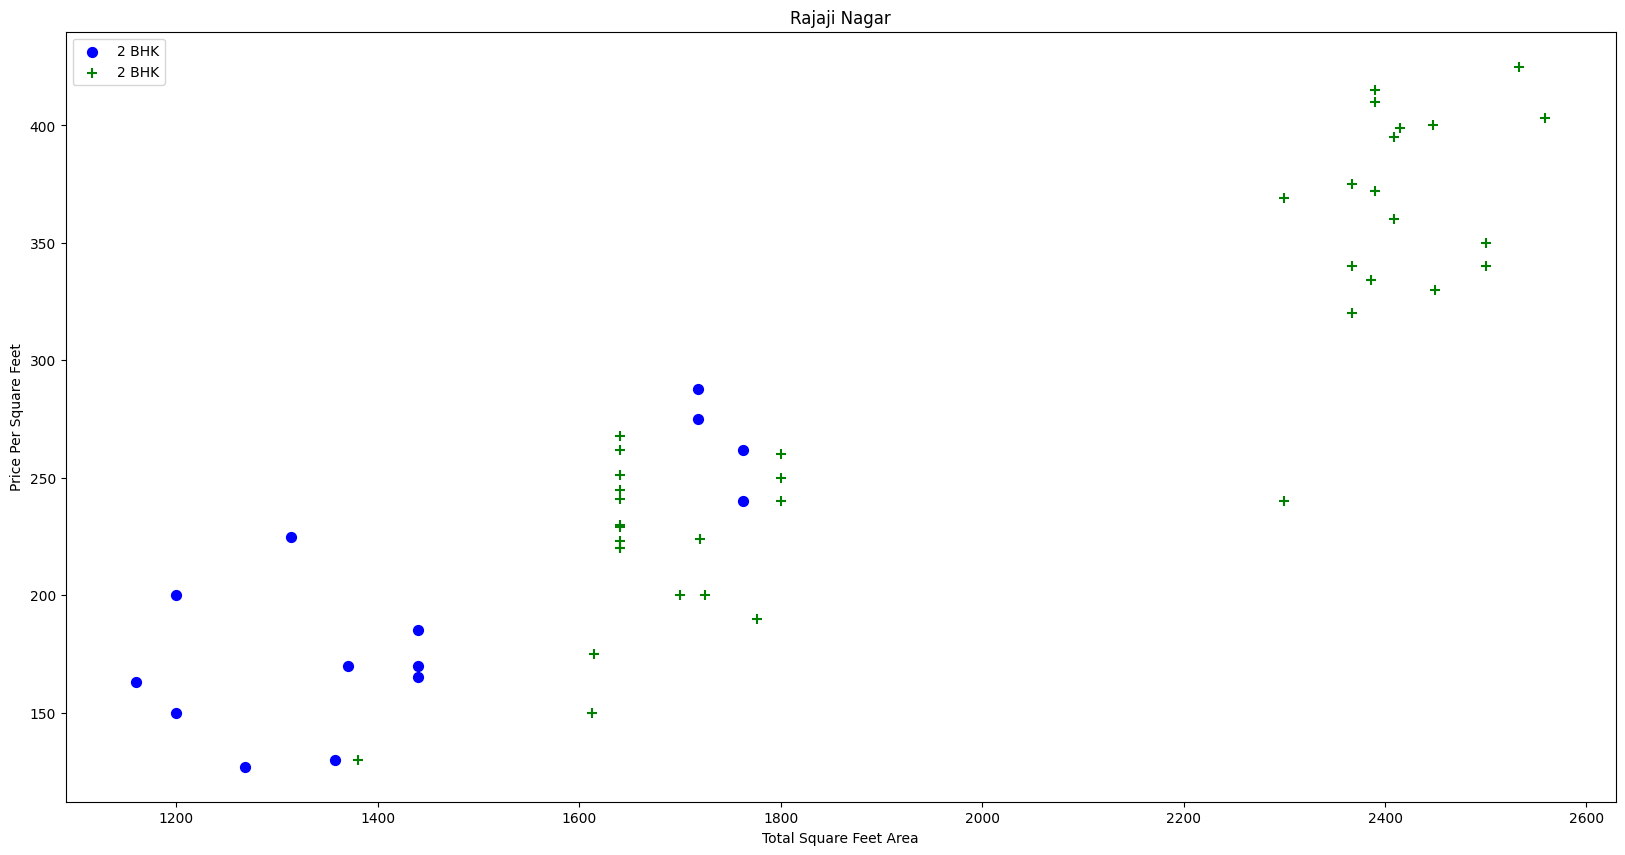

In [38]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] == (15, 10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
  plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = 'green', label = '2 BHK', s = 50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Square Feet")
  plt.title(location)
  plt.legend()
plot_scatter_chart(df5, "Rajaji Nagar")

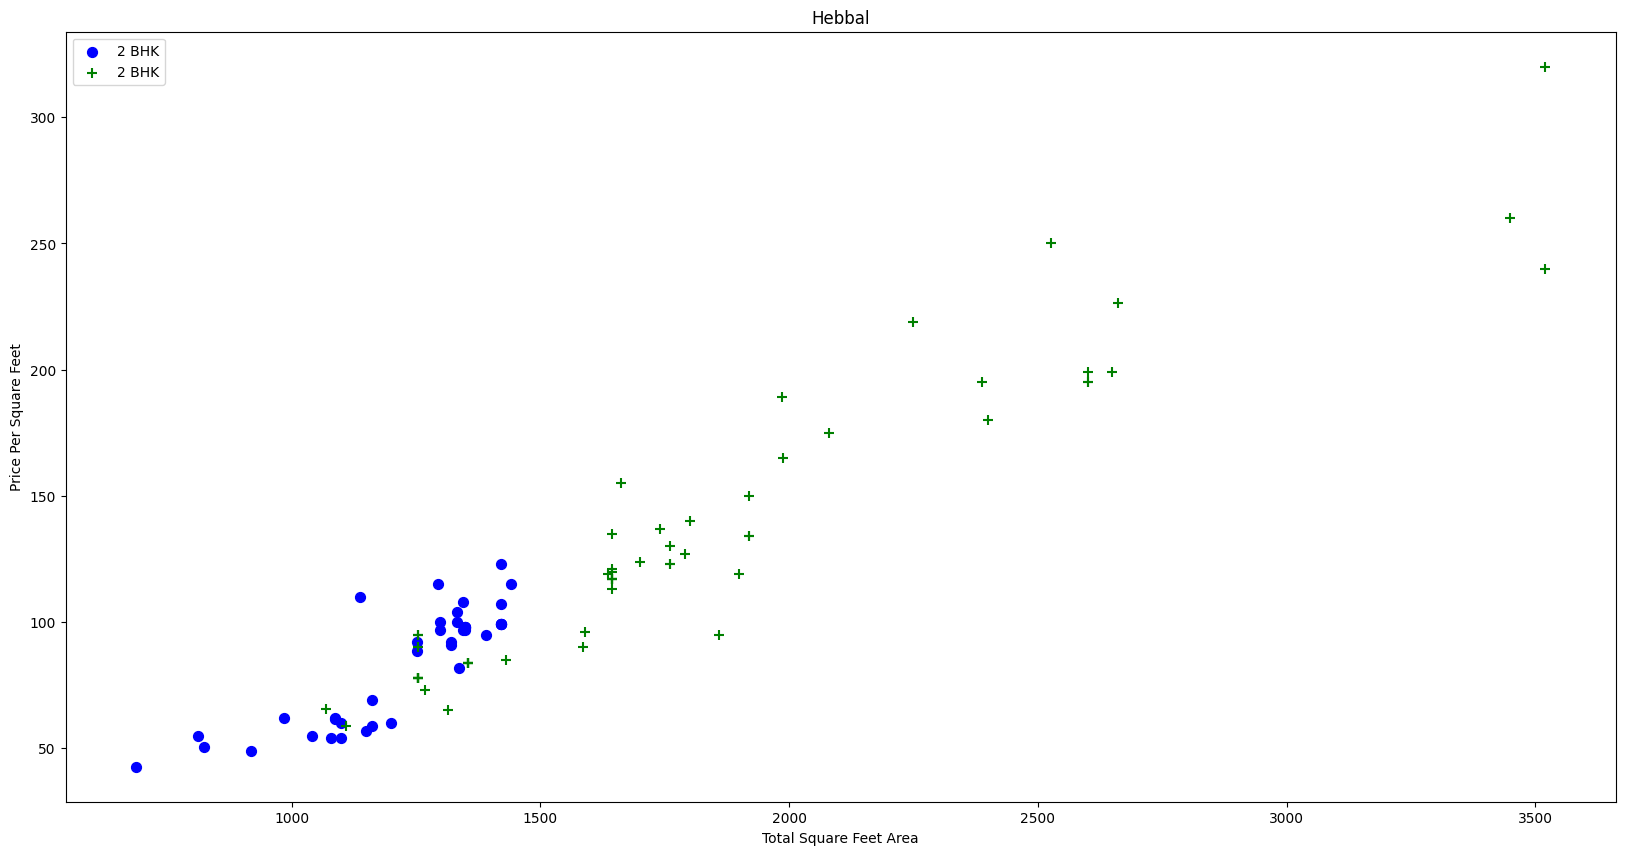

In [39]:
plot_scatter_chart(df5, "Hebbal")

*We can see that here for Hebbal Area there are 3 bhk price is less than the 2bhk. let's clean them now.*

In [40]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')


df6 = remove_bhk_outliers(df5)
df6.shape

(7342, 9)

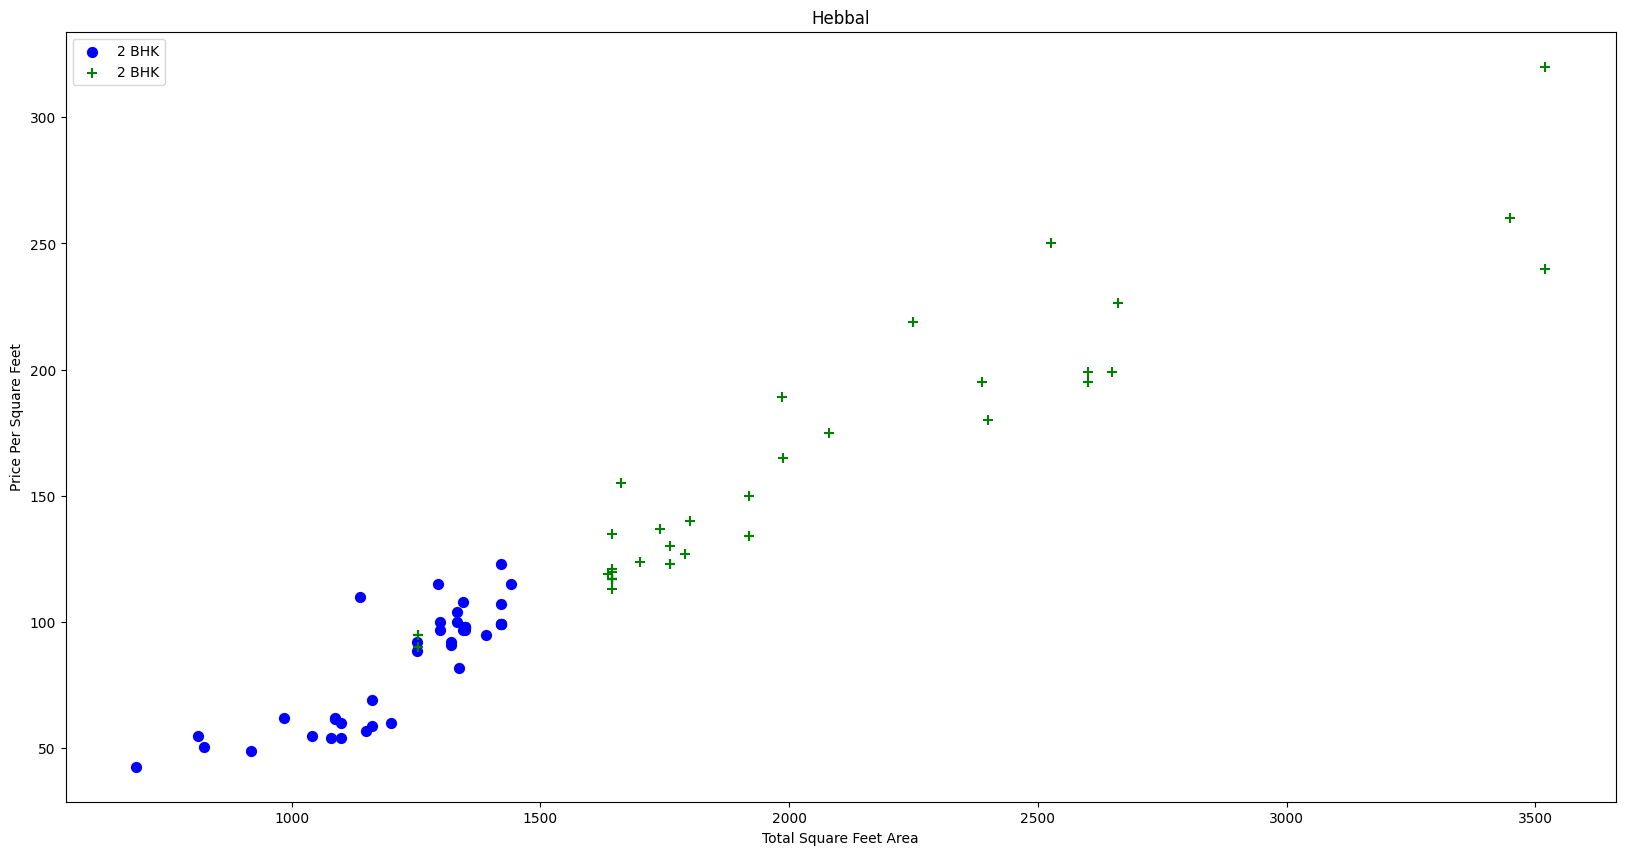

In [41]:
plot_scatter_chart(df6, "Hebbal")

Text(0, 0.5, 'Count')

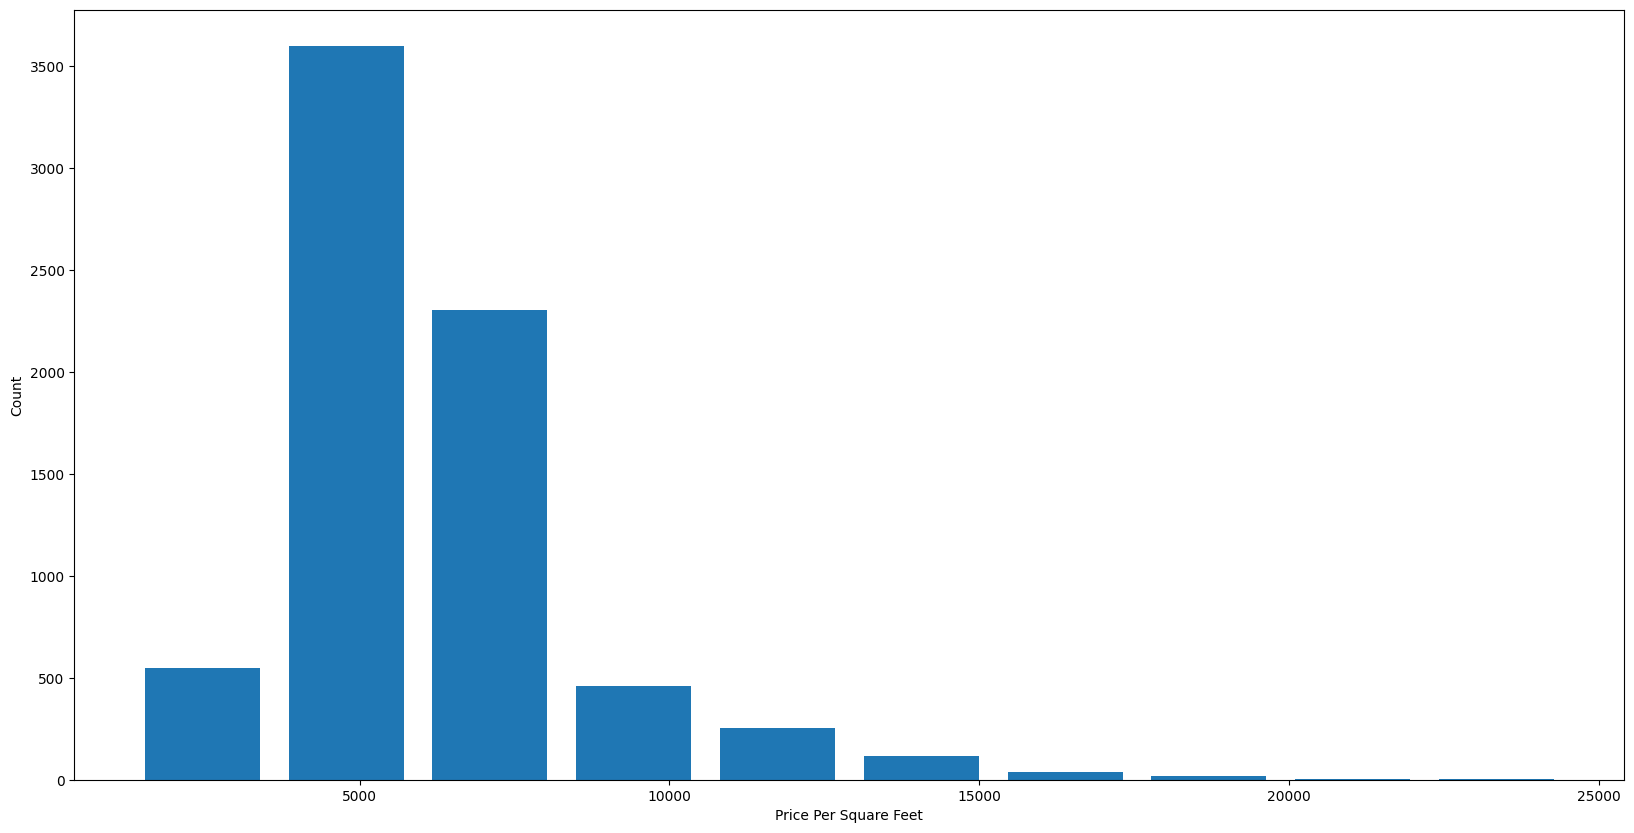

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df6.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [43]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df6[df6.bath > 10]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8527,Super built-up Area,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8616,Super built-up Area,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9351,Super built-up Area,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9682,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


*These Values of square feet for the bathrooms is ok.*

Text(0, 0.5, 'Count')

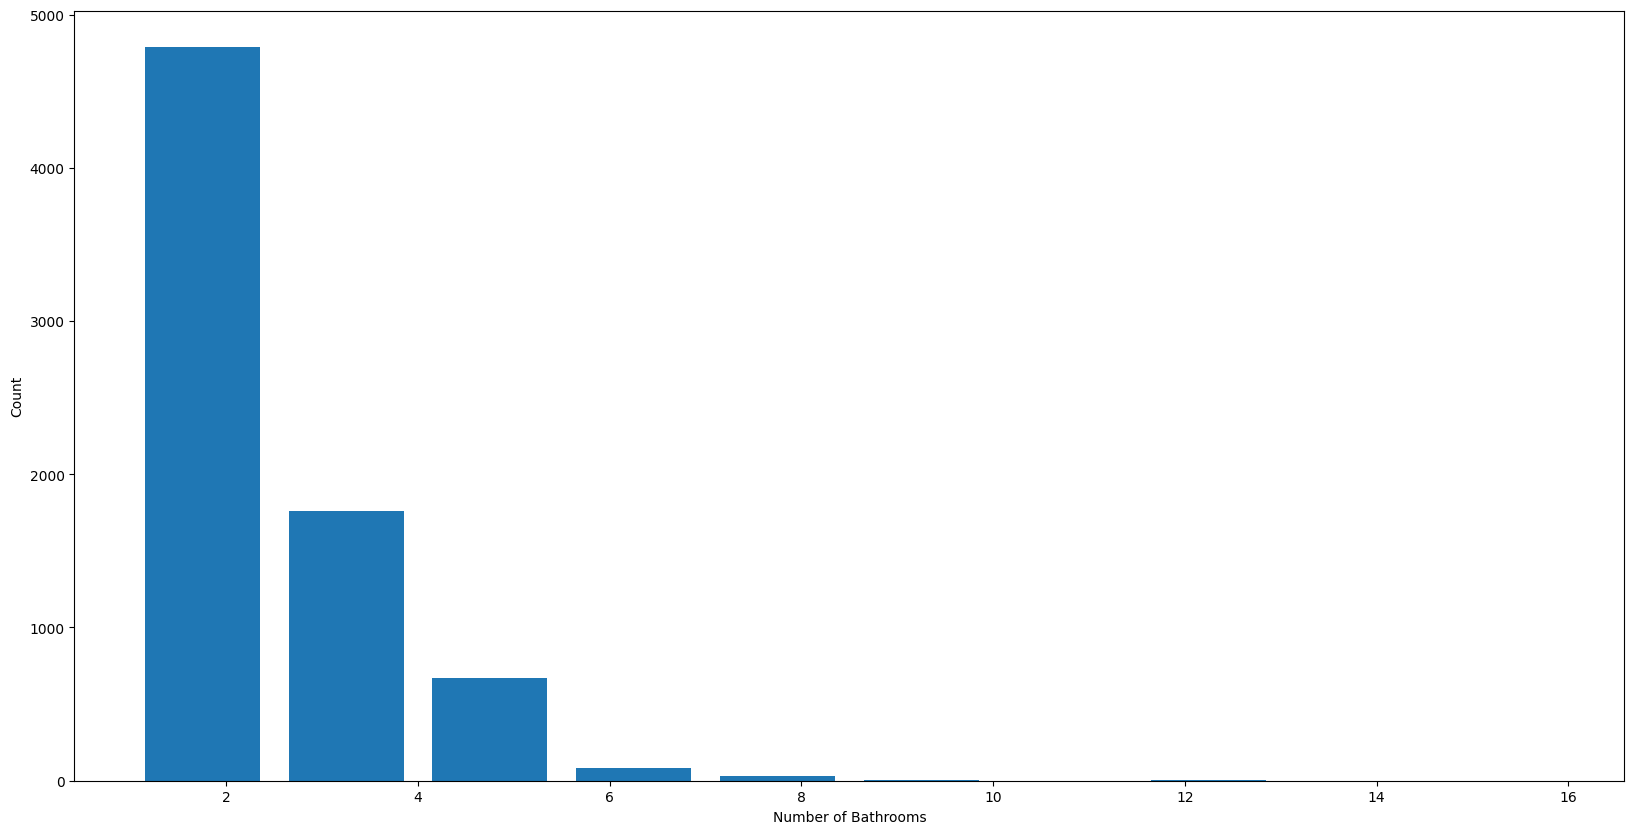

In [45]:
#No of Bedrooms lesser than Bathrooms +2 then we remove.
plt.hist(df6.bath, rwidth = 0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [46]:
df6[df6.bath>df6.bhk+2]

,area_type,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8452,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [47]:
df6 = df6[df6.bath<df6.bhk+2]
df6.shape

(7264, 9)

In [48]:
df6 = df6.drop(['size', 'price_per_sqft'], axis = 'columns')
df6.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3


In [49]:
df6.to_csv('banglore_house_price.csv', index = False)

In [50]:
df6.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [51]:
df6.area_type.unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

### **Encoding Categorical Data**

In [52]:
dummies_loc = pd.get_dummies(df6.location)
dummies_area_type = pd.get_dummies(df6.area_type)
dummies_area_type.head(3)

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1


In [53]:
dummies_area_type['Built-up  Area']

0        0
1        0
2        0
3        1
4        0
        ..
10279    0
10280    0
10283    0
10284    0
10287    0
Name: Built-up  Area, Length: 7264, dtype: uint8

In [54]:
dummies_area_type.rename(columns = {'Built-up  Area':	'Built-up Area', 'Carpet  Area':	'Carpet Area', 'Plot  Area':	'Plot Area', 'Super built-up  Area' : 'Super built-up Area'}, inplace = True)
dummies_area_type.columns

Index(['Built-up Area', 'Carpet Area', 'Plot Area', 'Super built-up Area'], dtype='object')

In [55]:
df7 = pd.concat([df6, dummies_loc.drop('other', axis = 1), dummies_area_type.drop('Built-up Area', axis = 1)], axis = 'columns')
df7.head(3)

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
df7.drop(['area_type', 'location'], axis = 1, inplace = True)

In [57]:
X = df7.drop(['price'], axis = 1)
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
y = df7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.preprocessing import LabelEncoder

oh_enc = LabelEncoder()

In [60]:
df6['area_type'] = oh_enc.fit_transform(df6['area_type'])
df6['location'] = oh_enc.fit_transform(df6['location'])

In [61]:
df6['area_type'].value_counts()

3    5305
0    1319
2     598
1      42
Name: area_type, dtype: int64

In [62]:
X_LE = df6.drop(['price'], axis = 1)
X_LE.head()

,area_type,location,total_sqft,bath,balcony,bhk
0,3,0,2850.0,4.0,1.0,4
1,3,0,1630.0,3.0,2.0,3
2,3,0,1875.0,2.0,3.0,3
3,0,0,1200.0,2.0,0.0,3
4,3,0,1235.0,2.0,2.0,2


In [63]:
y_LE = df6.price
y_LE.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LE, y_LE, test_size = 0.2, random_state = 10)

In [65]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7363400326035814

In [66]:
X_LE = df6.drop(['price', 'area_type', 'balcony'], axis = 1)
X_LE.head()

,location,total_sqft,bath,bhk
0,0,2850.0,4.0,4
1,0,1630.0,3.0,3
2,0,1875.0,2.0,3
3,0,1200.0,2.0,3
4,0,1235.0,2.0,2


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_LE, y_LE, test_size = 0.2, random_state = 10)

In [68]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.7359804146137463

In [69]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X_LE, y_LE, cv = cv)

array([0.69394207, 0.5961227 , 0.6447002 , 0.69169888, 0.67267438])

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [71]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_test, y_test)

0.8579217571101317

In [72]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.8088978 , 0.77445027, 0.84635879, 0.84462595, 0.82968147])

In [73]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

#Hyper Parameter Tuning
def find_best_model_using_gridsearchcv(X, y):
  models = {
      'linear_regression': {
          'model' : LinearRegression(),
          'params' : {'fit_intercept': [True, False]}
      },
      'lasso': {
          'model' : Lasso(),
          'params' : {
              'alpha': [1, 2],
              'selection': ['random', 'cyclic']}
      },
      'decision_tree': {
          'model' : DecisionTreeRegressor(),
          'params' : {'criterion': ['mse', 'friedman_mse'],
                      'splitter' : ['best', 'random']}
      },
  }
  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  for model, config in models.items():
    gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
    gs.fit(X, y)
    scores.append({
        'model' : model,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [74]:
find_best_model_using_gridsearchcv(X_LE, y_LE)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.659828,{'fit_intercept': True}
1,lasso,0.659627,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.547518,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [75]:
find_best_model_using_gridsearchcv(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.820803,{'fit_intercept': True}
1,lasso,0.664469,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.697894,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [76]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
def predict_price(sqft, bath, balcony, bhk, location, area_type):
  loc_index = np.where(X.columns == location)[0][0]
  area_index = np.where(X.columns == area_type)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = balcony
  x[3] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
    x[area_index] = 1

  return LR.predict([x])[0]

In [78]:
predict_price(1000, 2, 1, 2, '1st Phase JP Nagar', 'Super built-up Area')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.50690740597499

In [79]:
predict_price(1000, 3, 2, 3, '1st Phase JP Nagar', 'Super built-up Area')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.6066596320678

In [80]:
import pickle as pkl
with open('banglore_home_price_pred.pickle', 'wb') as f:
  pkl.dump(LR, f)

In [81]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("home_price_pred_cols.json", "w") as f:
  f.write(json.dumps(columns))